# K-Means Cluster Analysis on Country-level Data

**Problem Statement**: HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

**Objective**: To categorise the countries using socio-economic and health factors that determine the overall development of the country.

## Import necessary packages and functions

In [2]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

## Load dataset using pandas

In [3]:
df = pd.read_csv('Country-data.csv')

In [4]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2000,46.6000,5.2500,52.7000,2950,2.6200,63.0000,3.5000,2970
163,Venezuela,17.1000,28.5000,4.9100,17.6000,16500,45.9000,75.4000,2.4700,13500
164,Vietnam,23.3000,72.0000,6.8400,80.2000,4490,12.1000,73.1000,1.9500,1310
165,Yemen,56.3000,30.0000,5.1800,34.4000,4480,23.6000,67.5000,4.6700,1310


## Clean & Standardize the Data with sklearn

In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,41.1090,6.8157,46.8902,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,27.4120,2.7468,24.2096,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,0.1090,1.8100,0.0659,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,23.8000,4.9200,30.2000,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,35.0000,6.3200,43.3000,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,51.3500,8.6000,58.7500,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,200.0000,17.9000,174.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


We can see that there are no missing datapoints, so preprocessing is unnecessary (count is consistent across all columns)

## Data Visualization

**Visualize the given data to learn more about correlations and build a more refined model**

In [7]:
x1 = np.array(df['income'])
x2 = np.array(df['health'])
x3 = np.array(df['total_fer'])

In [27]:
modeldf = df.drop(columns = ['country'])
modeldf = modeldf.drop(columns= ['Class'])
modeldf

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200
...,...,...,...,...,...,...,...,...,...
162,29.2000,46.6000,5.2500,52.7000,2950,2.6200,63.0000,3.5000,2970
163,17.1000,28.5000,4.9100,17.6000,16500,45.9000,75.4000,2.4700,13500
164,23.3000,72.0000,6.8400,80.2000,4490,12.1000,73.1000,1.9500,1310
165,56.3000,30.0000,5.1800,34.4000,4480,23.6000,67.5000,4.6700,1310


(9.25, -0.25)

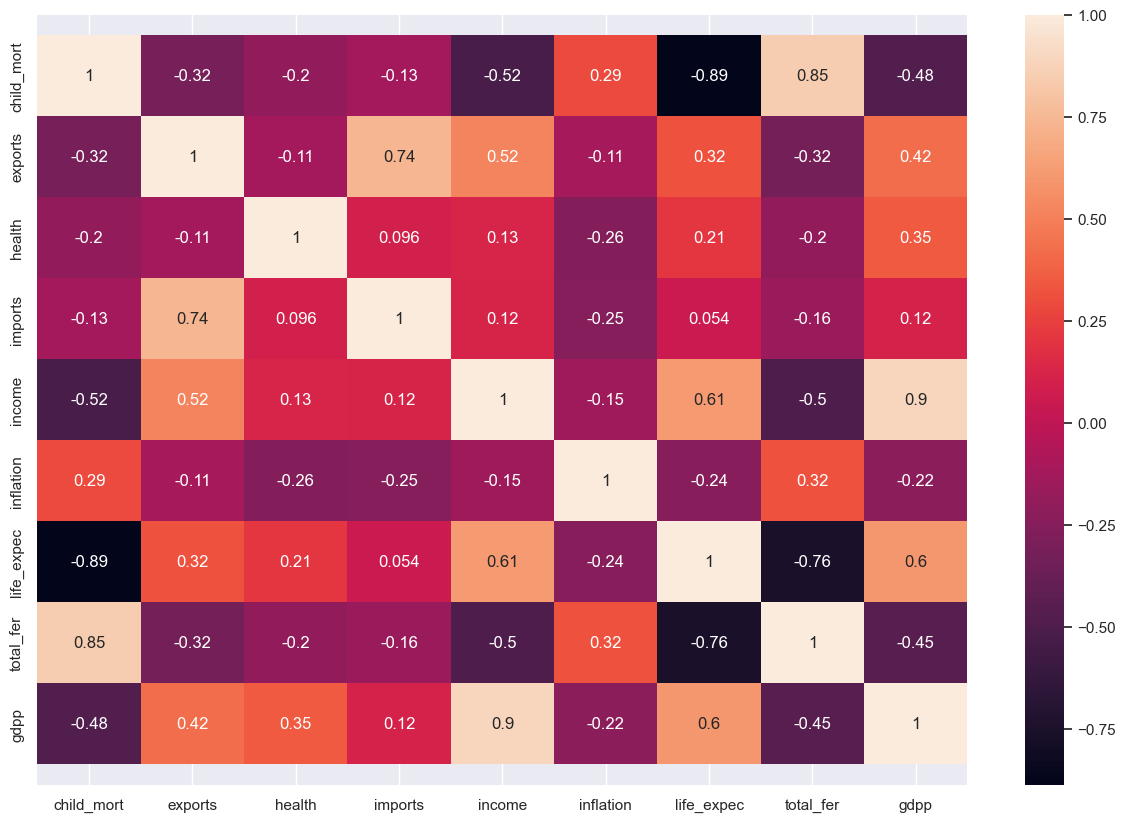

In [25]:
# Heatmap to visualize feature correlations

plt.figure(figsize = (15,10))
ax = sns.heatmap(modeldf.corr(), annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.25, top - 0.25)

From this heatmap we can see correlations between all features included in the dataset.
Notably, child_mort and life_expec are highly correlated (-0.89), and life_expec and total_fer are highly correlated (-0.76)



## Data Preprocessing

**Here we will prepare the data for cluster analysis, by converting the percentage values in the dataframe to real numbers**

This includes the imports, exports and health columns

In [28]:
# convert percentages to absolute values

modeldf['exports'] = modeldf['exports'] * modeldf['gdpp']/100
modeldf['imports'] = modeldf['imports'] * modeldf['gdpp']/100
modeldf['health'] = modeldf['health'] * modeldf['gdpp']/100

In [30]:
modeldf

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200
...,...,...,...,...,...,...,...,...,...
162,29.2000,1384.0200,155.9250,1565.1900,2950,2.6200,63.0000,3.5000,2970
163,17.1000,3847.5000,662.8500,2376.0000,16500,45.9000,75.4000,2.4700,13500
164,23.3000,943.2000,89.6040,1050.6200,4490,12.1000,73.1000,1.9500,1310
165,56.3000,393.0000,67.8580,450.6400,4480,23.6000,67.5000,4.6700,1310


**Next we will rescale the features through standardization scaling**

In [34]:
scaler = StandardScaler()
modeldf_scaled = scaler.fit_transform(modeldf)

## PCA (Principal Component Analysis)

Applying PCA to the data allows us to remove redundancies in the data, and streamline the data structure without losing significant amounts of variance from the original dataset 

Text(0, 0.5, 'Variance Ratio')

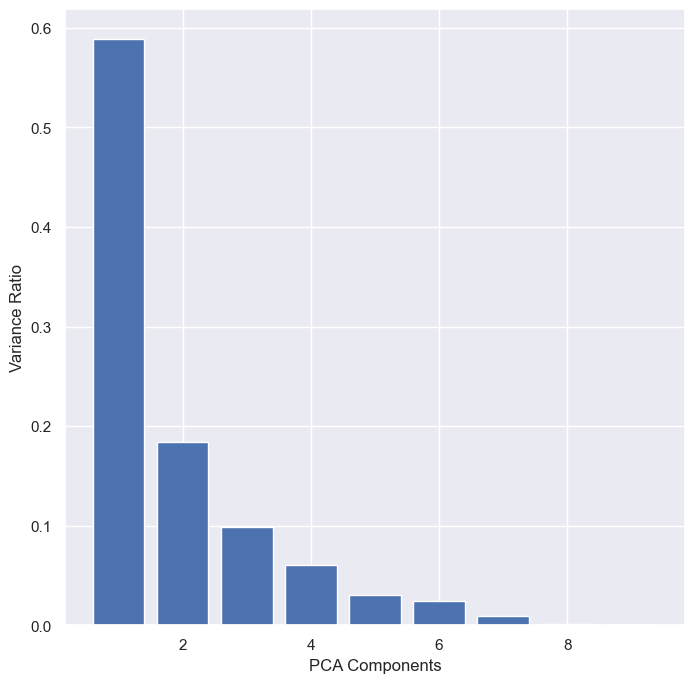

In [38]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(modeldf_scaled)

# plot explained variance ratio in bar graph
ax = plt.bar (range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components")
plt.ylabel("Variance Ratio")


We can see that the first component has an explained variance of nearly 60%, and the second has an explained variance of about 20%


Text(0, 0.5, 'Cumulative Explained Variance')

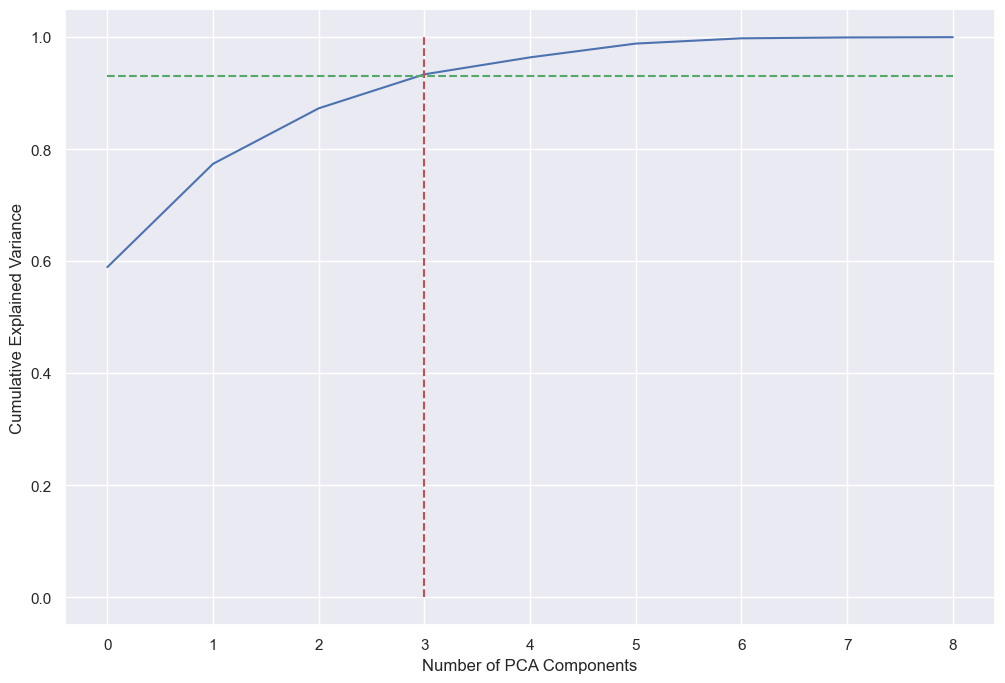

In [40]:
# Scree plot to determine which components to retain

fig = plt.figure(figsize= (12,8))
# plot cumulative sum of explained variance ratios
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=3, ymax=1, ymin=0, colors='r', linestyles='--')
plt.hlines(y=0.93, xmax=8, xmin=0, colors='g', linestyles='--')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')

Therefore we can infer that over 90% o the variance is explained by the first 3 principal components.
As such, we should use these 3 components for the clustering analysis.

Next we will determine which features are well explained by the principal components we have determined to be relevant

## Clustering the Data

**Need to find optimal k-value (number of clusters) using Elbow method**

We will continuously iterate from *k=1* to *k=n*, and for each value of *k* will calculate a within-cluster sum of squares (WCSS) or inertia value. We will then plot the results from the Elbow method to determine the optimal k-value.

First, lets visualize the datapoints to get a sense of what we're working with.

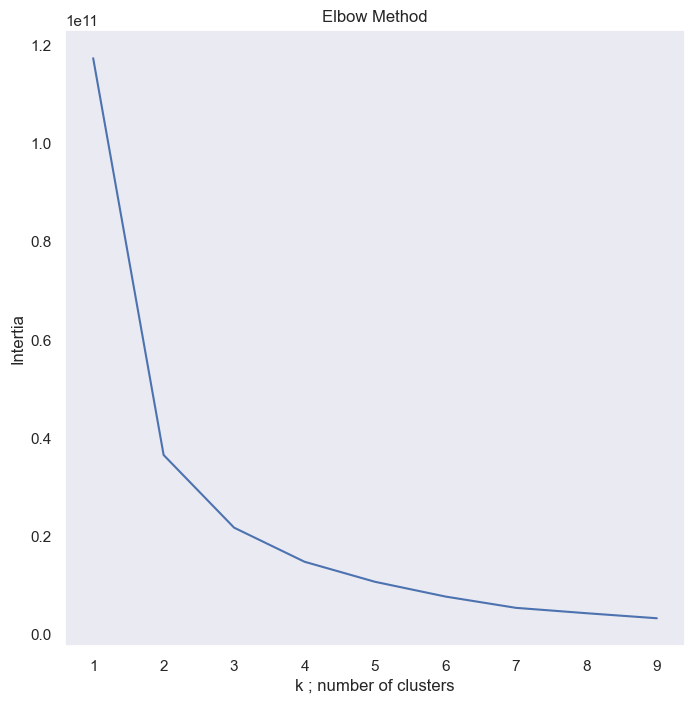

In [9]:
def elbow_method(data, n):
    sse = {}
    for k in range(1,n):
        kmeans = KMeans(n_clusters=k, max_iter=1000, n_init=10).fit(data)
        sse[k] = kmeans.inertia_

    sns.lineplot(x = list(sse.keys()), y = list(sse.values()))
    plt.title('Elbow Method')
    plt.xlabel('k ; number of clusters')
    plt.ylabel('Intertia')
    plt.grid()
    plt.show()

elbow_method(modeldf, 10)
    

**As we can see, the optimal k-value is 2**

In [10]:
model = KMeans(n_clusters=2, max_iter=1000, n_init=10)
model.fit(modeldf)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
df['Class'] = labels

